# EDA

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import math
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [4]:
start = time.time()

# 1. Preprocessing

### i. Read Dataframe

In [5]:
df_1 = pd.read_csv('AirPassengers.csv')
df_2 = pd.read_csv('daily-total-female-births-CA.csv')
df_3 = pd.read_csv('Temp.csv', skiprows = [3652])

### ii. Drop nan

In [6]:
df_1 = df_1.rename(columns = {'Month': 'Time', '#Passengers': 'X_t'})
df_2 = df_2.rename(columns = {'date': 'Time', 'births': 'X_t'})
df_3 = df_3.rename(columns = {'Date': 'Time', 'Daily minimum temperatures in Melbourne, Australia, 1981-1990': 'X_t'})

In [7]:
df_1['Time'] = pd.to_datetime(df_1['Time'])
df_2['Time'] = pd.to_datetime(df_2['Time'])
df_3['Time'] = pd.to_datetime(df_3['Time'])

In [8]:
def transform_date(date):

    try:

        new_date = date.year + (date.month - 1)/12 + date.day/365

        return new_date
    
    except:

        return float('nan')

In [9]:
def transform_value(value):

    try:

        return float(value)
    
    except:

        return float('nan')

In [10]:
df_1['Time'] = df_1['Time'].map(lambda x: transform_date(x))
df_2['Time'] = df_2['Time'].map(lambda x: transform_date(x))
df_3['Time'] = df_3['Time'].map(lambda x: transform_date(x))

In [11]:
df_1['X_t'] = df_1['X_t'].map(lambda x: transform_value(x))
df_2['X_t'] = df_2['X_t'].map(lambda x: transform_value(x))
df_3['X_t'] = df_3['X_t'].map(lambda x: transform_value(x))

In [12]:
df_1 = df_1.dropna()
df_2 = df_2.dropna()
df_3 = df_3.dropna()

# 2. EDA

### i. Split

In [13]:
train_1 = df_1[df_1['Time'] <= 1955]
val_1 = df_1[(df_1['Time'] > 1955) & (df_1['Time'] <= 1958)]
test_1 = df_1[df_1['Time'] > 1958]

In [14]:
train_2 = df_2[df_2['Time'] <= 1959.505479]
val_2 = df_2[(df_2['Time'] > 1959.505479) & (df_2['Time'] <= 1959.752740)]
test_2 = df_2[df_2['Time'] > 1959.752740]

In [15]:
train_3 = df_3[df_3['Time'] <= 1986.005479]
val_3 = df_3[(df_3['Time'] > 1986.005479) & (df_3['Time'] <= 1988.504110)]
test_3 = df_3[df_3['Time'] > 1988.504110]

### ii. Numerical and categorical

We only have the variable time.

### iii. FillNaNs

In [16]:
df_1.isna().sum()

Time    0
X_t     0
dtype: int64

In [17]:
df_2.isna().sum()

Time    0
X_t     0
dtype: int64

In [18]:
df_3.isna().sum()

Time    0
X_t     0
dtype: int64

### iv. Analysis "y" variable

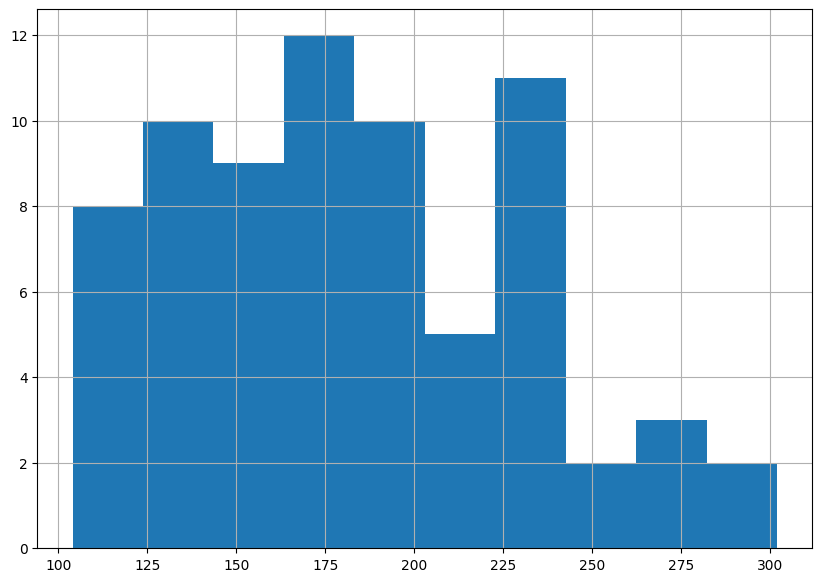

In [19]:
plt.figure(figsize = (10, 7))
train_1['X_t'].hist()
plt.show()

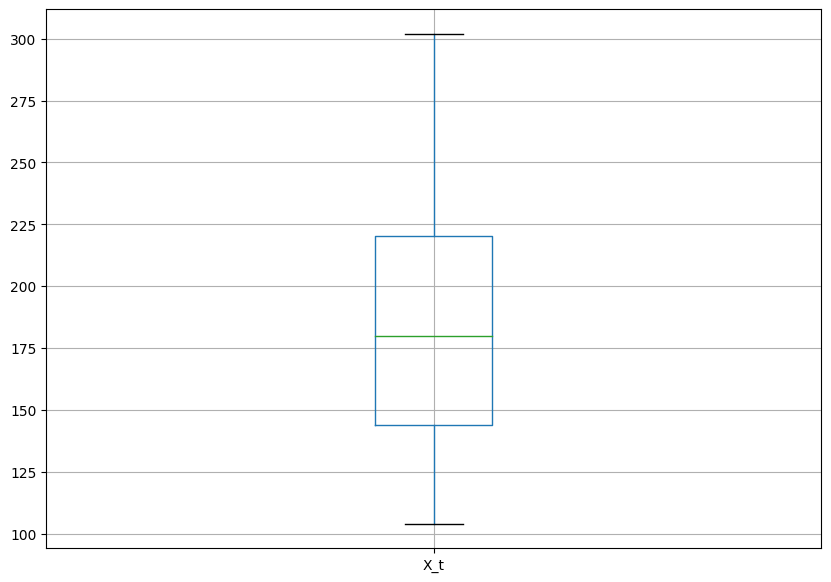

In [20]:
plt.figure(figsize = (10, 7))
train_1[['X_t']].boxplot()
plt.show()

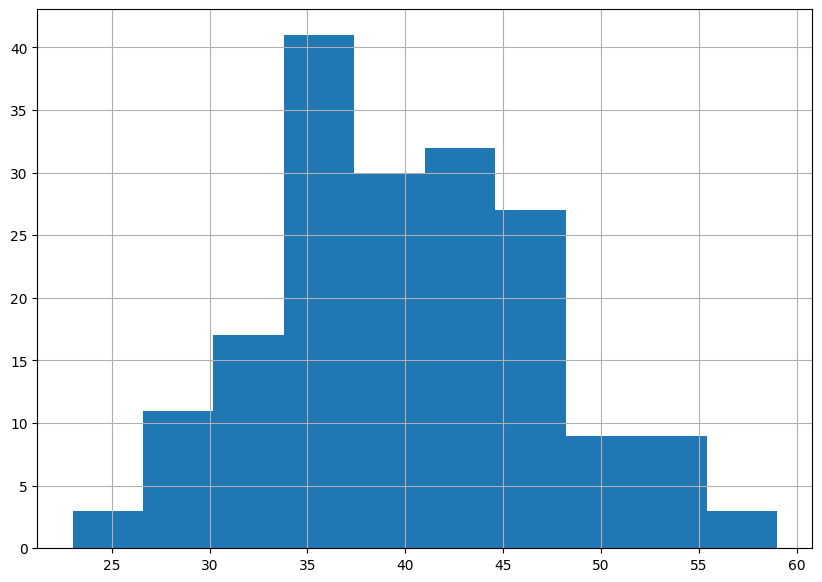

In [21]:
plt.figure(figsize = (10, 7))
train_2['X_t'].hist()
plt.show()

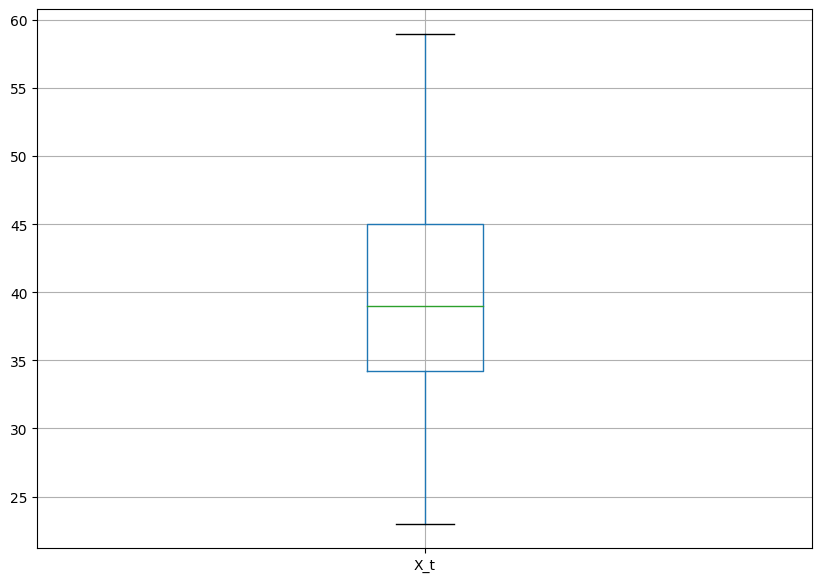

In [22]:
plt.figure(figsize = (10, 7))
train_2[['X_t']].boxplot()
plt.show()

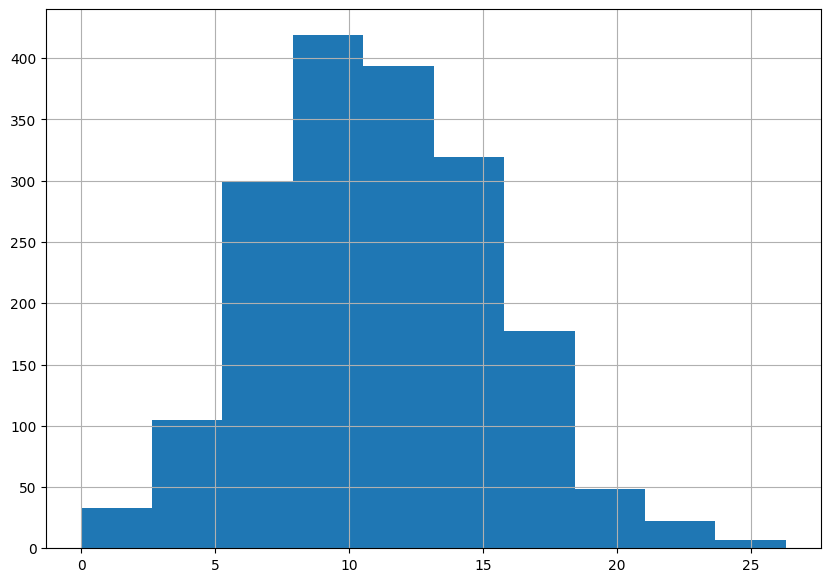

In [23]:
plt.figure(figsize = (10, 7))
train_3['X_t'].hist()
plt.show()

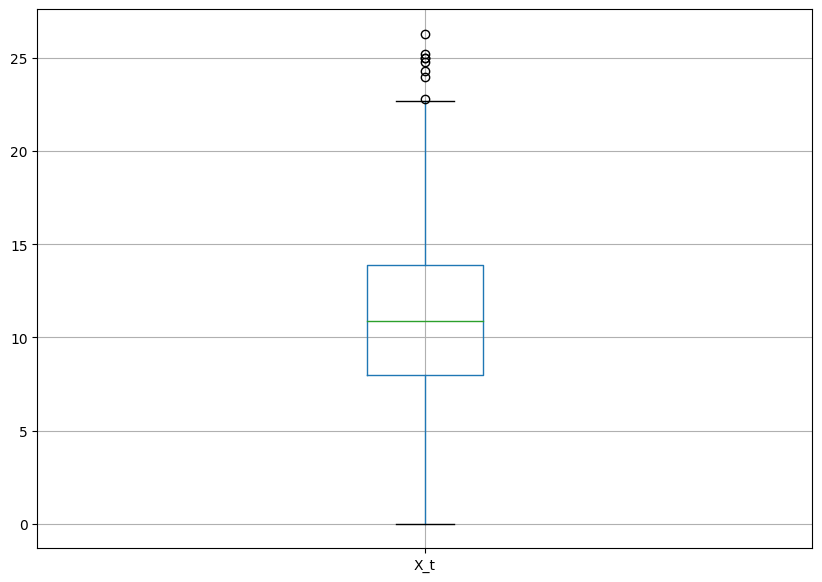

In [24]:
plt.figure(figsize = (10, 7))
train_3[['X_t']].boxplot()
plt.show()

### v. Analysis "y" variable period by period

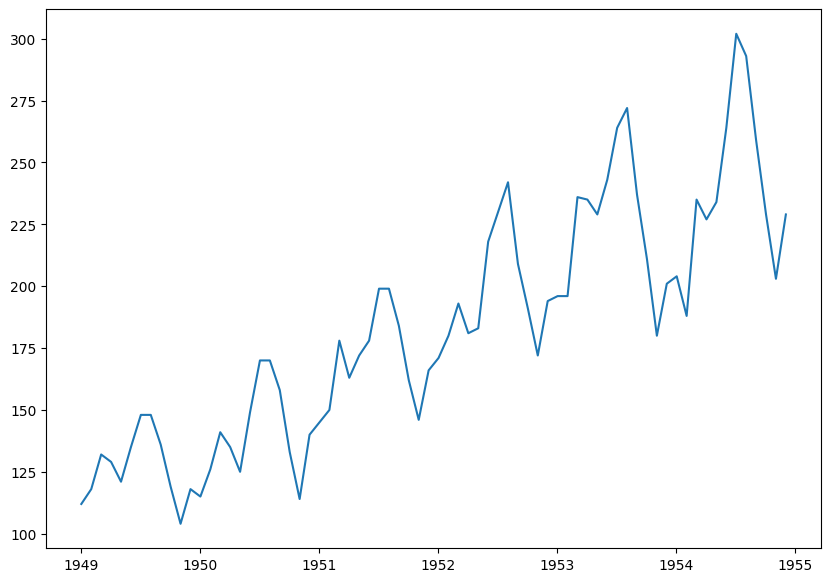

In [25]:
plt.figure(figsize = (10, 7))
plt.plot(train_1['Time'], train_1['X_t'])
plt.show()

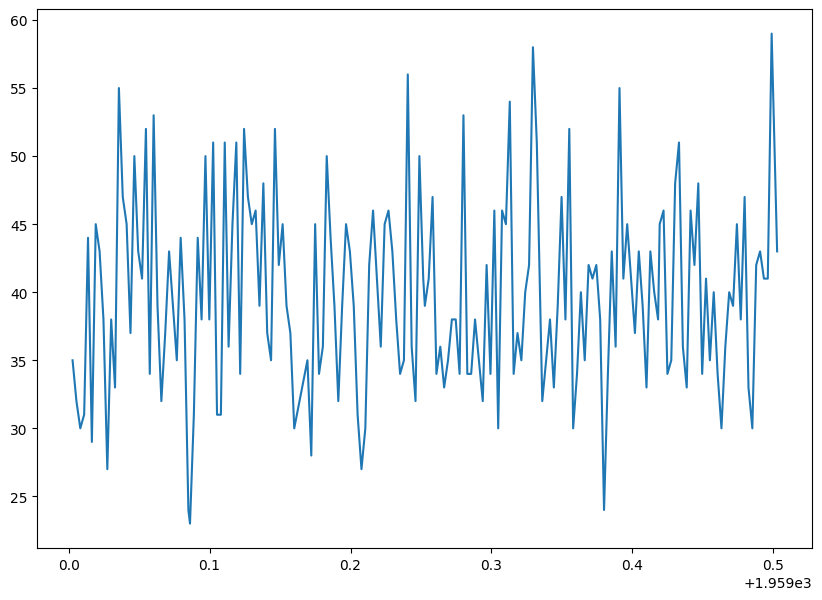

In [26]:
plt.figure(figsize = (10, 7))
plt.plot(train_2['Time'], train_2['X_t'])
plt.show()

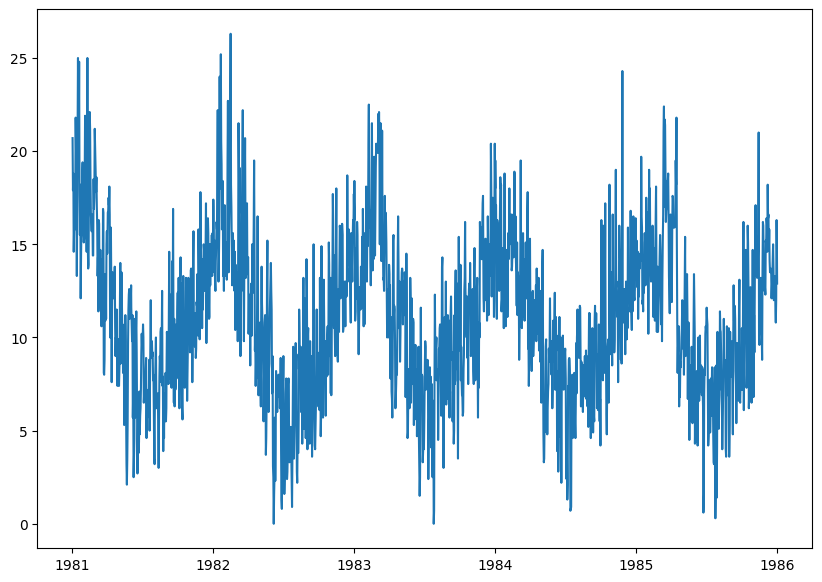

In [27]:
plt.figure(figsize = (10, 7))
plt.plot(train_3['Time'], train_3['X_t'])
plt.show()

### vi. Relation dependent variable with independent: Numerical (Spearman Correlation)

In [28]:
train_1['rank_Time'] = train_1['Time'].rank(method = 'first', ascending = True)
train_1['rank_X_t'] = train_1['X_t'].rank(method = 'first', ascending = True)

In [29]:
round(train_1['rank_Time'].corr(train_1['rank_X_t'])*100, 2)

88.88

In [30]:
train_2['rank_Time'] = train_2['Time'].rank(method = 'first', ascending = True)
train_2['rank_X_t'] = train_2['X_t'].rank(method = 'first', ascending = True)

In [31]:
round(train_2['rank_Time'].corr(train_2['rank_X_t'])*100, 2)

7.44

In [32]:
train_3['rank_Time'] = train_3['Time'].rank(method = 'first', ascending = True)
train_3['rank_X_t'] = train_3['X_t'].rank(method = 'first', ascending = True)

In [33]:
round(train_3['rank_Time'].corr(train_3['rank_X_t'])*100, 2)

-6.56

### vii. Relation dependent variable with independent: Categorical (Anova)

We only have numerical variables.

### viii. Plot the relation between dependent and independent variables: Numerical

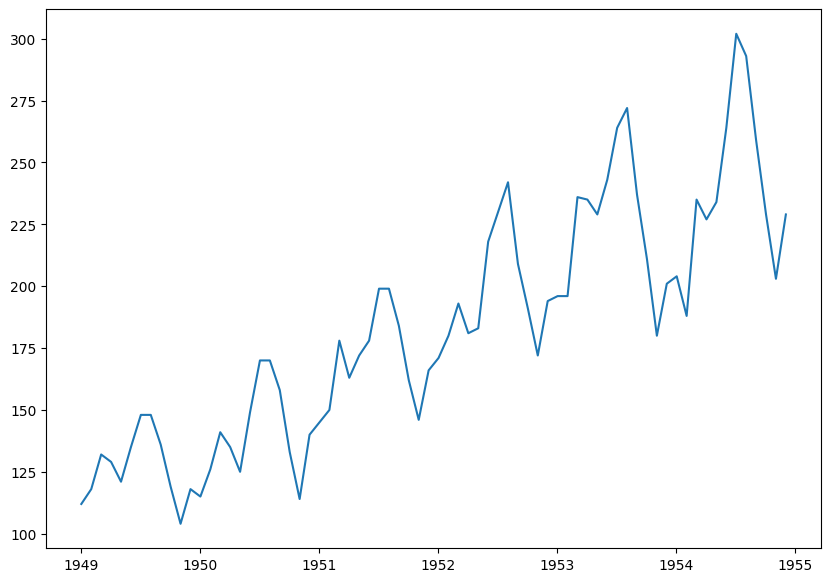

In [34]:
plt.figure(figsize = (10, 7))
plt.plot(train_1['Time'], train_1['X_t'])
plt.show()

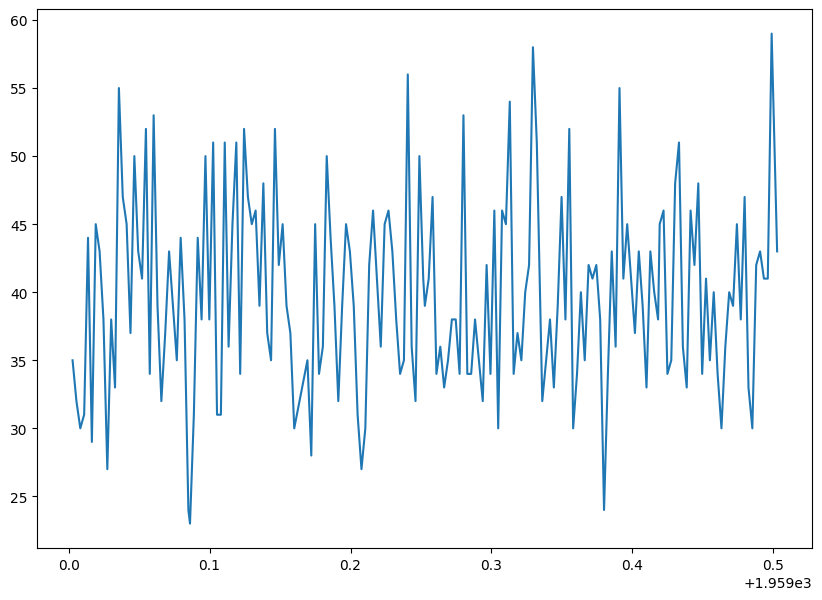

In [35]:
plt.figure(figsize = (10, 7))
plt.plot(train_2['Time'], train_2['X_t'])
plt.show()

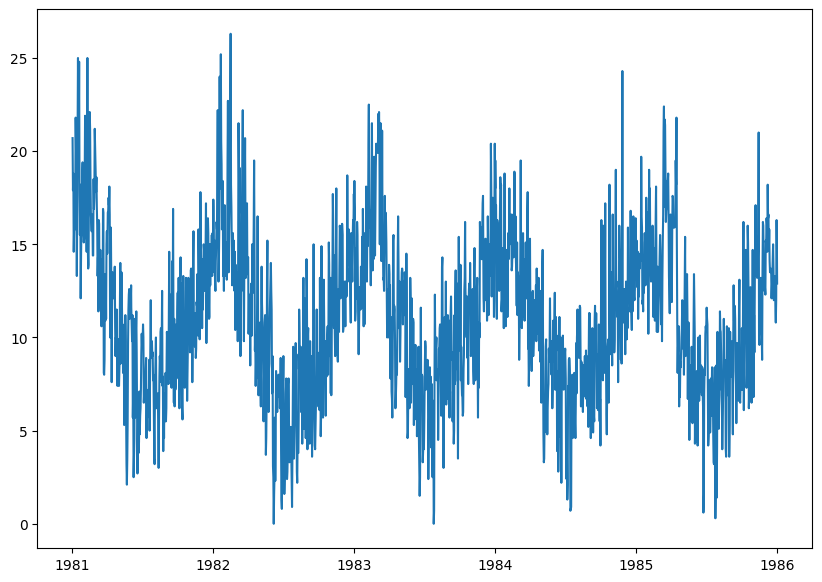

In [36]:
plt.figure(figsize = (10, 7))
plt.plot(train_3['Time'], train_3['X_t'])
plt.show()

### ix. Plot the relation between dependent and independent variables: Categorical

We only have numerical variables.

### x. Patterns of interest

- Relation between time and the time series for every dataframe.

### xi. Plotting every independent variable: Numerical

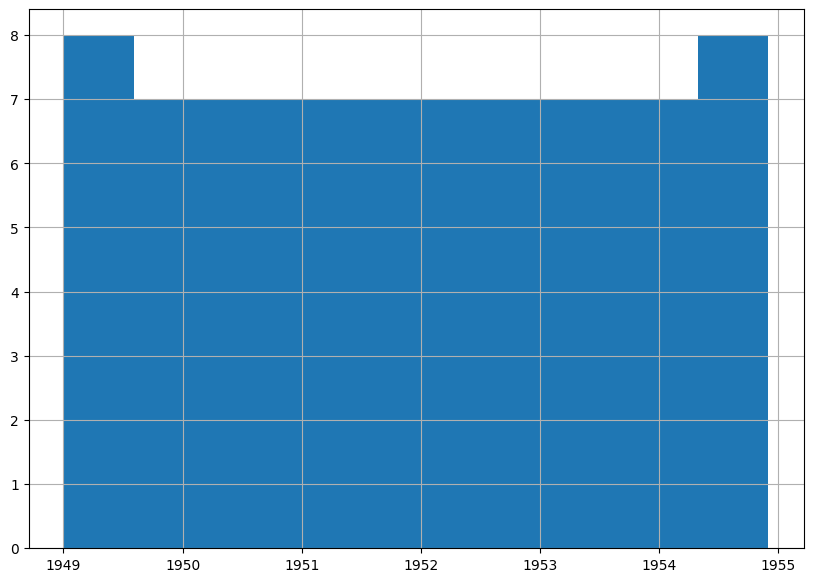

In [37]:
plt.figure(figsize = (10, 7))
train_1['Time'].hist()
plt.show()

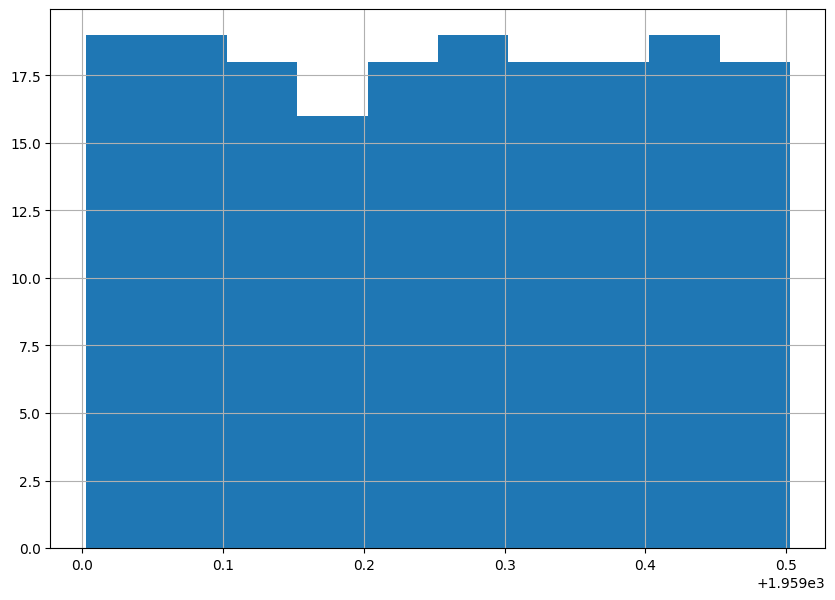

In [38]:
plt.figure(figsize = (10, 7))
train_2['Time'].hist()
plt.show()

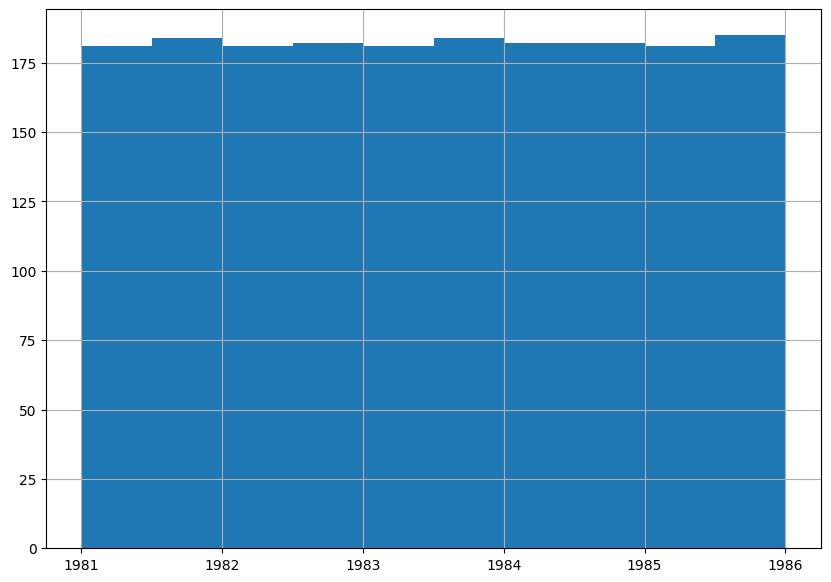

In [39]:
plt.figure(figsize = (10, 7))
train_3['Time'].hist()
plt.show()

### xii. Plotting every independent variable: Categorical

We only have numerical variables.

### xiii. Relation between numerical independent variables (Spearman)

We only have 1 variable (Time).

### xiv. Relation between categorical independent variables (Chi-Square)

We only have numerical variables.

### xv. Encoding

It's not necessary.

### xvi. Relation between all variables

We only have 1 variable.

### xvii. Stationary Test

In [40]:
from statsmodels.tsa.stattools import adfuller

In [41]:
result_1 = adfuller(train_1['X_t'].values)

In [42]:
print('ADF Statistic: %f' % result_1[0])
print('p-value: %f' % result_1[1])
print('Critical Values:')
for key, value in result_1[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.565093
p-value: 0.878676
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594


**Comment:** The serie is not stationary.

In [43]:
result_2 = adfuller(train_2['X_t'].values)

In [44]:
print('ADF Statistic: %f' % result_2[0])
print('p-value: %f' % result_2[1])
print('Critical Values:')
for key, value in result_2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.561754
p-value: 0.000000
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575


**Comment:** The serie is stationary.

In [45]:
result_3 = adfuller(train_3['X_t'].values)

In [46]:
print('ADF Statistic: %f' % result_3[0])
print('p-value: %f' % result_3[1])
print('Critical Values:')
for key, value in result_3[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.571091
p-value: 0.006338
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


**Comment:** The serie is stationary.

### xviii. ACF and PACF

In [47]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

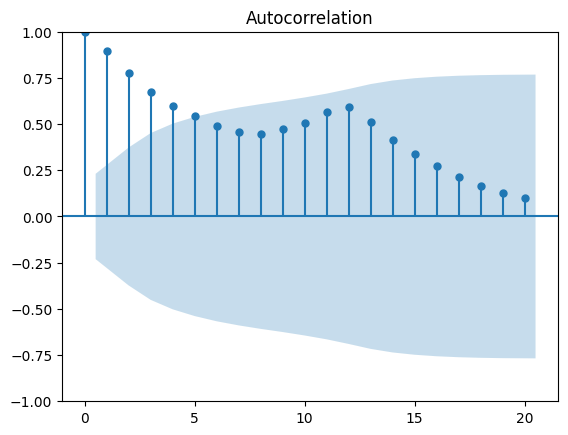

In [48]:
plot_acf(train_1['X_t'], lags = 20)
plt.show()

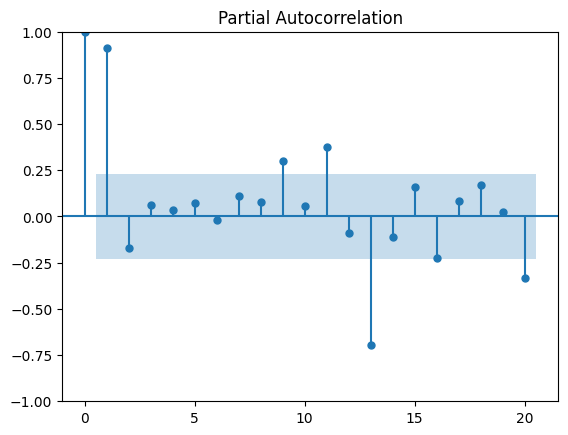

In [49]:
plot_pacf(train_1['X_t'], lags = 20)
plt.show()

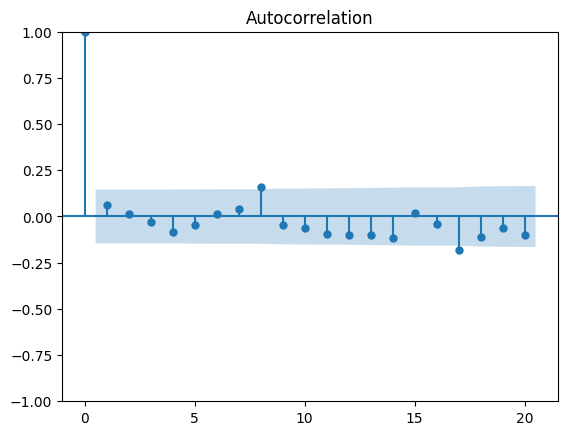

In [50]:
plot_acf(train_2['X_t'], lags = 20)
plt.show()

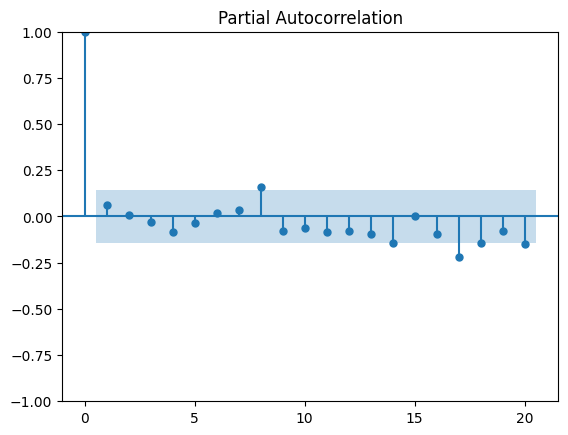

In [51]:
plot_pacf(train_2['X_t'], lags = 20)
plt.show()

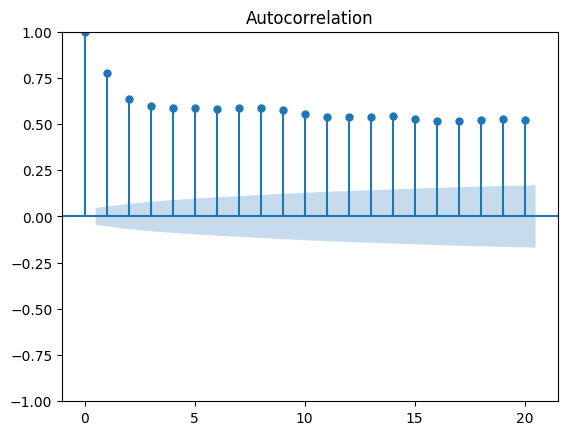

In [52]:
plot_acf(train_3['X_t'], lags = 20)
plt.show()

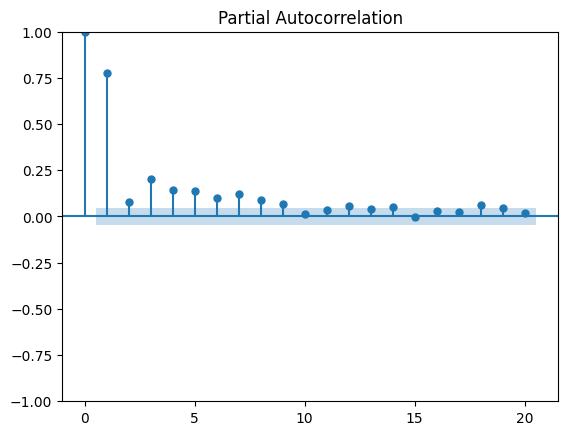

In [53]:
plot_pacf(train_3['X_t'], lags = 20)
plt.show()

### xix. Periodgram

In [54]:
from scipy import signal

In [55]:
f_1, Pxx_1 = signal.periodogram(train_1['X_t'])

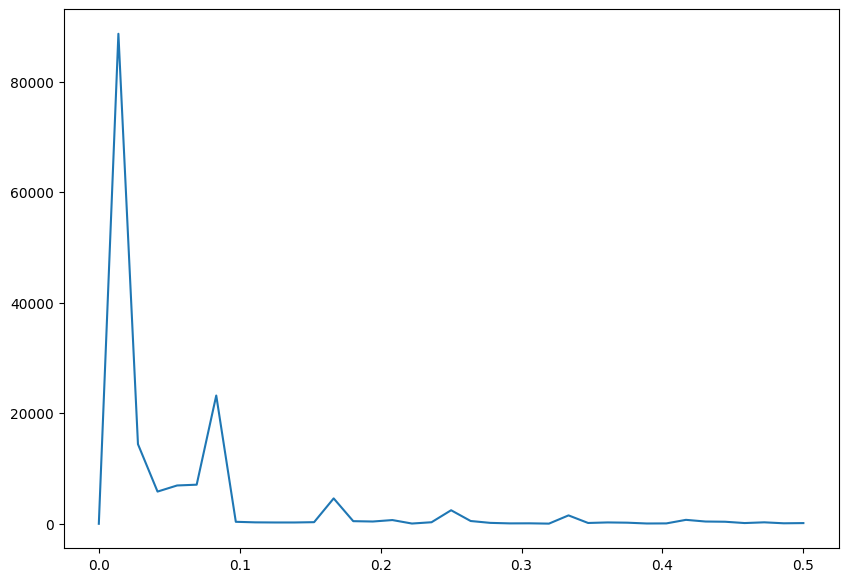

In [56]:
plt.figure(figsize = (10, 7))
plt.plot(f_1, Pxx_1)
plt.show()

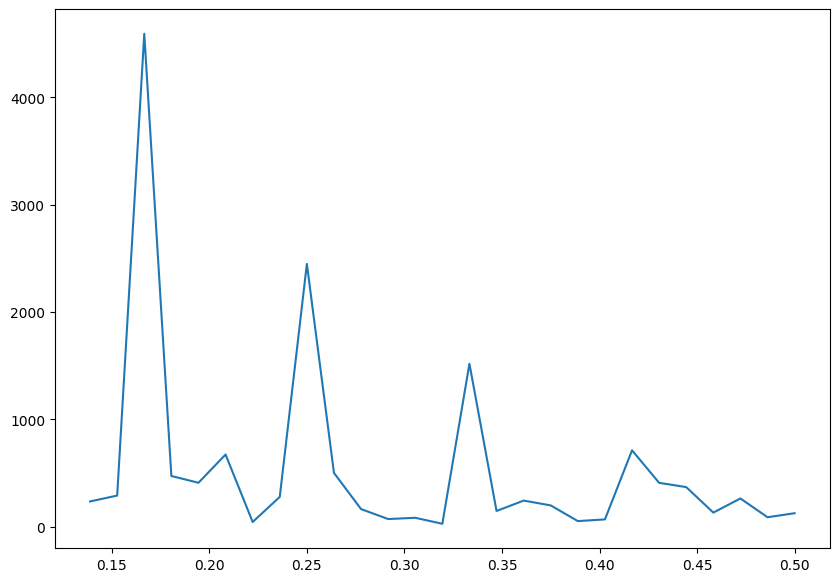

In [57]:
plt.figure(figsize = (10, 7))
plt.plot(f_1[10:], Pxx_1[10:])
plt.show()

In [58]:
f_1 = f_1[10:]
Pxx_1 = Pxx_1[10:]

In [59]:
T_1_N = 1/f_1[Pxx_1.argmax()]

In [60]:
T_1_N

6.0

In [61]:
T_1 = (train_1['Time'].iloc[1] - train_1['Time'].iloc[0])*T_1_N

In [62]:
T_1

0.49999999999954525

In [63]:
f_2, Pxx_2 = signal.periodogram(train_2['X_t'])

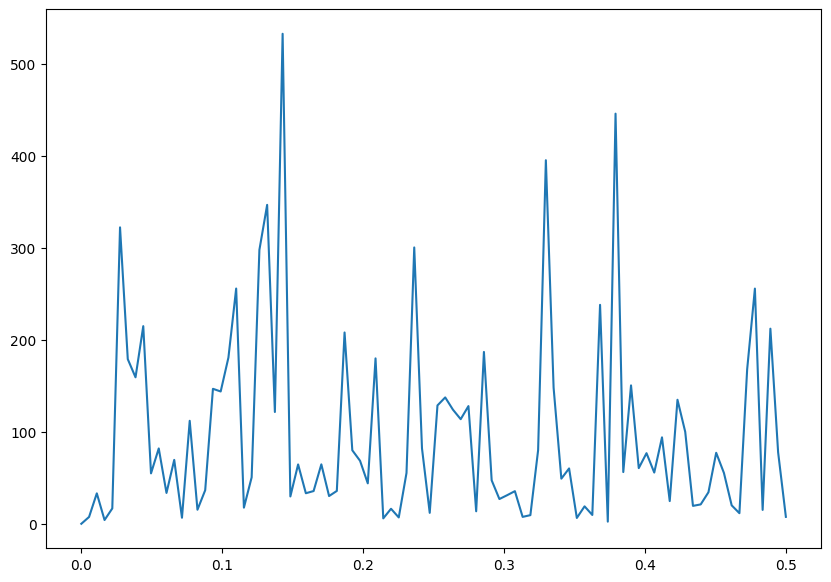

In [64]:
plt.figure(figsize = (10, 7))
plt.plot(f_2, Pxx_2)
plt.show()

In [65]:
T_2_N = 1/f_2[Pxx_2.argmax()]

In [66]:
T_2_N

6.999999999999999

In [67]:
T_2 = (train_2['Time'].iloc[1] - train_2['Time'].iloc[0])*T_2_N

In [68]:
T_2

0.01917808219150174

In [69]:
f_3, Pxx_3 = signal.periodogram(train_3['X_t'])

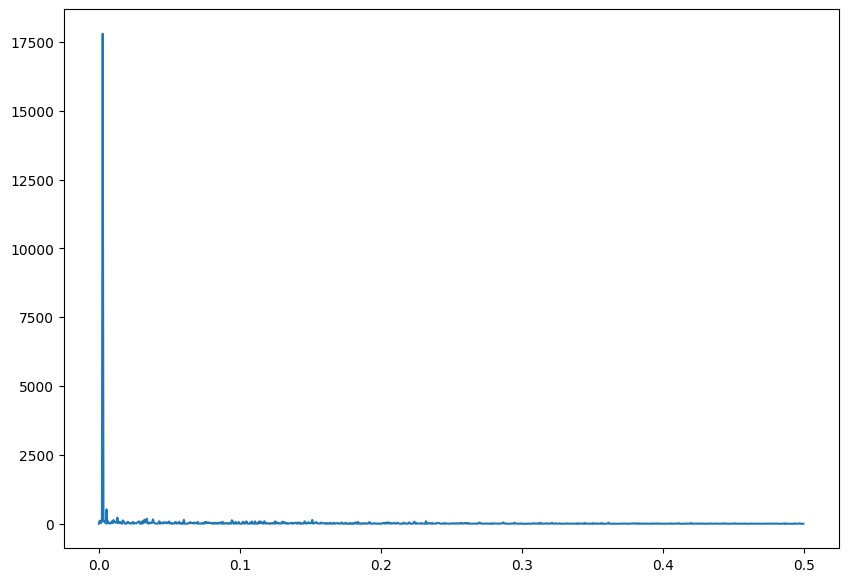

In [70]:
plt.figure(figsize = (10, 7))
plt.plot(f_3, Pxx_3)
plt.show()

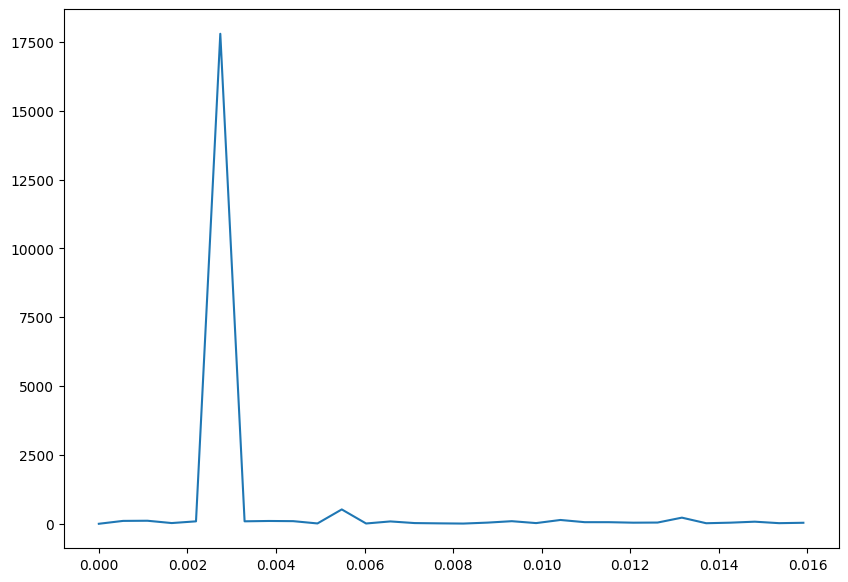

In [71]:
plt.figure(figsize = (10, 7))
plt.plot(f_3[0:30], Pxx_3[0:30])
plt.show()

In [72]:
f_3 = f_3[0:30]
Pxx_3 = Pxx_3[0:30]

In [73]:
T_3_N = 1/f_3[Pxx_3.argmax()]

In [74]:
T_3_N

364.6

In [75]:
T_3 = (train_3['Time'].iloc[1] - train_3['Time'].iloc[0])*T_3_N

In [76]:
T_3

0.9989041095745052

### Time of execution

In [77]:
end = time.time()

In [78]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 3 seconds.
